In [66]:
import glob
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss

In [188]:
import os
import geopandas as gpd
from geopandas import GeoDataFrame
import pysal
from pysal.spreg import ols
from pysal.spreg import ml_error
from pysal.spreg import ml_lag
import fiona
import shapely
from shapely.geometry import Point, Polygon
sns.set_style("darkgrid")
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
%matplotlib inline
from scipy import stats
from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster, FastMarkerCluster

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
# merges all metropolitan data csv's into 3 seperate csv's
files = glob.glob("data/*/*metropolitan-street.csv")
df = pd.concat([pd.read_csv(f) for f in files])

df.to_csv("metropolitan_street.csv")

files = glob.glob("data/*/*metropolitan-stop-and-search.csv")
df = pd.concat([pd.read_csv(f) for f in files])

df.to_csv("metropolitan_stop_and_search.csv")

files = glob.glob("data/*/*metropolitan-outcomes.csv")
df = pd.concat([pd.read_csv(f) for f in files])

df.to_csv("metropolitan_outcomes.csv")

In [16]:
#merges all csv's into 3 csv's
#files = glob.glob("data/*/*outcomes.csv")
#df = pd.concat([pd.read_csv(f) for f in files])

#df.to_csv("merged_outcomes.csv")

#files = glob.glob("data/*/*search.csv")
#df = pd.concat([pd.read_csv(f) for f in files])

#df.to_csv("merged_search.csv")

#files = glob.glob("data/*/*outcomes.csv")
#df = pd.concat([pd.read_csv(f) for f in files])

#df.to_csv("merged_street.csv")

In [4]:
# converts metroplolitan csv's to dataframes
df_outcomes = pd.read_csv('metropolitan_outcomes.csv')
df_search = pd.read_csv('metropolitan_stop_and_search.csv')
df_street = pd.read_csv('metropolitan_street.csv')

In [5]:
df_outcomes.head()

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,0,dfed7fe69d34e95206735e253f6a40e423ce482d2d86ee...,2019-01,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified
1,1,b95b66158b3f3646c4c219369097f6c764aee344c69a31...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.039718,51.523067,On or near BOUNDARY LANE,E01003603,Newham 028B,Suspect charged
2,2,1c93d41dfb2e1a60ca42684d6661b8a354664ac704ea9e...,2019-01,Metropolitan Police Service,Metropolitan Police Service,-0.078589,51.584685,On or near KIRKTON ROAD,E01002073,Haringey 024D,Suspect charged
3,3,305ae4e4ddbe23b34406a5f9fcf093555f0b8b1dc08aea...,2019-01,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,NaN,Local resolution
4,4,f635bab9d182aac7d24e051ad2e251864e8b48bc4fce19...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.125253,51.496279,On or near YARNTON WAY,E01000422,Bexley 002C,Local resolution


In [6]:
df_search.head()

,Unnamed: 0,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,0,Person search,2019-01-01T00:00:00+00:00,False,NaN,51.517497,-0.210115,Male,over 34,Black/African/Caribbean/Black British - Caribbean,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
1,1,Person search,2019-01-01T00:01:00+00:00,False,NaN,51.507613,-0.127701,Male,10-17,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Evidence of offences under the Act,Arrest,NaN,NaN
2,2,Person and Vehicle search,2019-01-01T00:04:00+00:00,False,NaN,51.492082,0.054987,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,NaN,NaN
3,3,Person and Vehicle search,2019-01-01T00:05:00+00:00,False,NaN,51.558910,0.070161,Male,18-24,Black/African/Caribbean/Black British - African,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,NaN,NaN
4,4,Person search,2019-01-01T00:05:00+00:00,False,NaN,51.558910,0.070161,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN


In [7]:
df_street.head()

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,0,a8977a2a4e14252420371eb993d52e4d0b8288a7c833e6...,2019-01,Metropolitan Police Service,Metropolitan Police Service,-0.709911,50.784615,On or near Rochester Way,E01031384,Arun 018E,Violence and sexual offences,Status update unavailable,NaN
1,1,NaN,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,2,934e173f2bc2e1dd3a257b37939d8f97575d3eeb89ff0c...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Burglary,Status update unavailable,NaN
3,3,4f5b7e424bc78b1fb8c32e07da61176d2cbc5a3849d8e1...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140634,51.583427,On or near Rams Grove,E01000027,Barking and Dagenham 001A,Burglary,Status update unavailable,NaN
4,4,53d960600a4a9f54b785f598af4c75bdef2f79bce1a41b...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.141143,51.590873,On or near Furze Farm Close,E01000027,Barking and Dagenham 001A,Drugs,Investigation complete; no suspect identified,NaN


In [8]:
df_street['Location'].value_counts()[:15]

On or near Supermarket                            116326
On or near Parking Area                            85661
On or near Shopping Area                           75294
On or near Petrol Station                          56323
On or near Sports/Recreation Area                  45128
On or near Nightclub                               36015
No Location                                        34005
On or near Pedestrian Subway                       29838
On or near Further/Higher Educational Building     21522
On or near Theatre/Concert Hall                    21062
On or near Hospital                                18950
On or near Police Station                          17364
On or near High Street                             10220
On or near Conference/Exhibition Centre             9107
On or near Park/Open Space                          6823
Name: Location, dtype: int64

In [9]:
df_street.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362840 entries, 0 to 3362839
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   Crime ID               object 
 2   Month                  object 
 3   Reported by            object 
 4   Falls within           object 
 5   Longitude              float64
 6   Latitude               float64
 7   Location               object 
 8   LSOA code              object 
 9   LSOA name              object 
 10  Crime type             object 
 11  Last outcome category  object 
 12  Context                float64
dtypes: float64(3), int64(1), object(9)
memory usage: 333.5+ MB


In [10]:
df_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649105 entries, 0 to 1649104
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0    1649105 non-null  int64  
 1   Crime ID      1649105 non-null  object 
 2   Month         1649105 non-null  object 
 3   Reported by   1649105 non-null  object 
 4   Falls within  1649105 non-null  object 
 5   Longitude     1629300 non-null  float64
 6   Latitude      1629300 non-null  float64
 7   Location      1649105 non-null  object 
 8   LSOA code     1629300 non-null  object 
 9   LSOA name     1629300 non-null  object 
 10  Outcome type  1649105 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 138.4+ MB


In [11]:
df_outcomes.describe()

,Unnamed: 0,Longitude,Latitude
count,1.649105e+06,1.629300e+06,1.629300e+06
mean,3.802697e+04,-1.179751e-01,5.151150e+01
std,3.316551e+04,1.551539e-01,7.854778e-02
min,0.000000e+00,-5.669618e+00,5.008352e+01
25%,1.309100e+04,-2.020180e-01,5.146870e+01
50%,3.061200e+04,-1.102720e-01,5.151589e+01
75%,5.211000e+04,-2.607600e-02,5.155623e+01
max,1.707070e+05,1.741738e+00,5.571940e+01


In [12]:
df_search.describe()

,Unnamed: 0,Policing operation,Latitude,Longitude,Outcome linked to object of search,Removal of more than just outer clothing
count,807959.000000,0.0,723805.000000,723805.000000,0.0,0.0
mean,11882.689312,NaN,51.508158,-0.108791,NaN,NaN
std,7743.813799,NaN,0.062783,0.139128,NaN,NaN
min,0.000000,NaN,51.170392,-2.930152,NaN,NaN
25%,5610.000000,NaN,51.473253,-0.187172,NaN,NaN
50%,11221.000000,NaN,51.515216,-0.101651,NaN,NaN
75%,17051.000000,NaN,51.548246,-0.019207,NaN,NaN
max,43540.000000,NaN,54.617903,1.726337,NaN,NaN


In [13]:
df_street.describe()

,Unnamed: 0,Longitude,Latitude,Context
count,3.362840e+06,3.328835e+06,3.328835e+06,0.0
mean,4.698427e+04,-1.199394e-01,5.151207e+01,NaN
std,2.746180e+04,1.553038e-01,7.973006e-02,NaN
min,0.000000e+00,-5.669618e+00,5.008352e+01,NaN
25%,2.335300e+04,-2.020970e-01,5.147046e+01,NaN
50%,4.670600e+04,-1.127920e-01,5.151592e+01,NaN
75%,7.005900e+04,-2.964700e-02,5.155557e+01,NaN
max,1.140070e+05,1.756430e+00,5.571940e+01,NaN


In [14]:
df_search['Gender'].value_counts()

Male      738683
Female     57613
Other        560
Name: Gender, dtype: int64

In [15]:
df_street['Crime type'].value_counts()

Anti-social behaviour           956450
Violence and sexual offences    700761
Vehicle crime                   327418
Other theft                     295114
Burglary                        193679
Public order                    162432
Criminal damage and arson       157066
Drugs                           138136
Theft from the person           121655
Shoplifting                     110781
Robbery                          88628
Bicycle theft                    63147
Other crime                      30510
Possession of weapons            17063
Name: Crime type, dtype: int64

In [16]:
df_street['Location'].value_counts()

On or near Supermarket               116326
On or near Parking Area               85661
On or near Shopping Area              75294
On or near Petrol Station             56323
On or near Sports/Recreation Area     45128
                                      ...  
On or near Shelton Close                  1
On or near Parry Green South              1
On or near Rushton Avenue                 1
On or near East Terrace                   1
On or near Nore Close                     1
Name: Location, Length: 38528, dtype: int64

In [17]:
df_outcomes['Month'].value_counts()

2020-04    170708
2020-03    134112
2020-11     97619
2020-09     82185
2021-01     77334
2020-05     76629
2021-07     72509
2020-10     66447
2020-06     65563
2021-04     63722
2020-12     63626
2020-07     62146
2021-06     55139
2021-02     54000
2021-05     52201
2021-12     48409
2021-03     48348
2020-08     44963
2021-09     43671
2021-08     41004
2021-10     40864
2021-11     36832
2019-03     26664
2019-02     25611
2019-01     13805
2019-05      8984
2019-04      8497
2020-01      8162
2019-07      7806
2019-08      7579
2019-10      7561
2020-02      7518
2019-11      7484
2019-09      7329
2019-06      7290
2019-12      6784
Name: Month, dtype: int64

In [53]:
df_filter = df_street[['Month', 'Crime type', 'Unnamed: 0']]
df_street_time = df_filter.groupby(['Month', 'Crime type']).count().unstack().fillna(0)

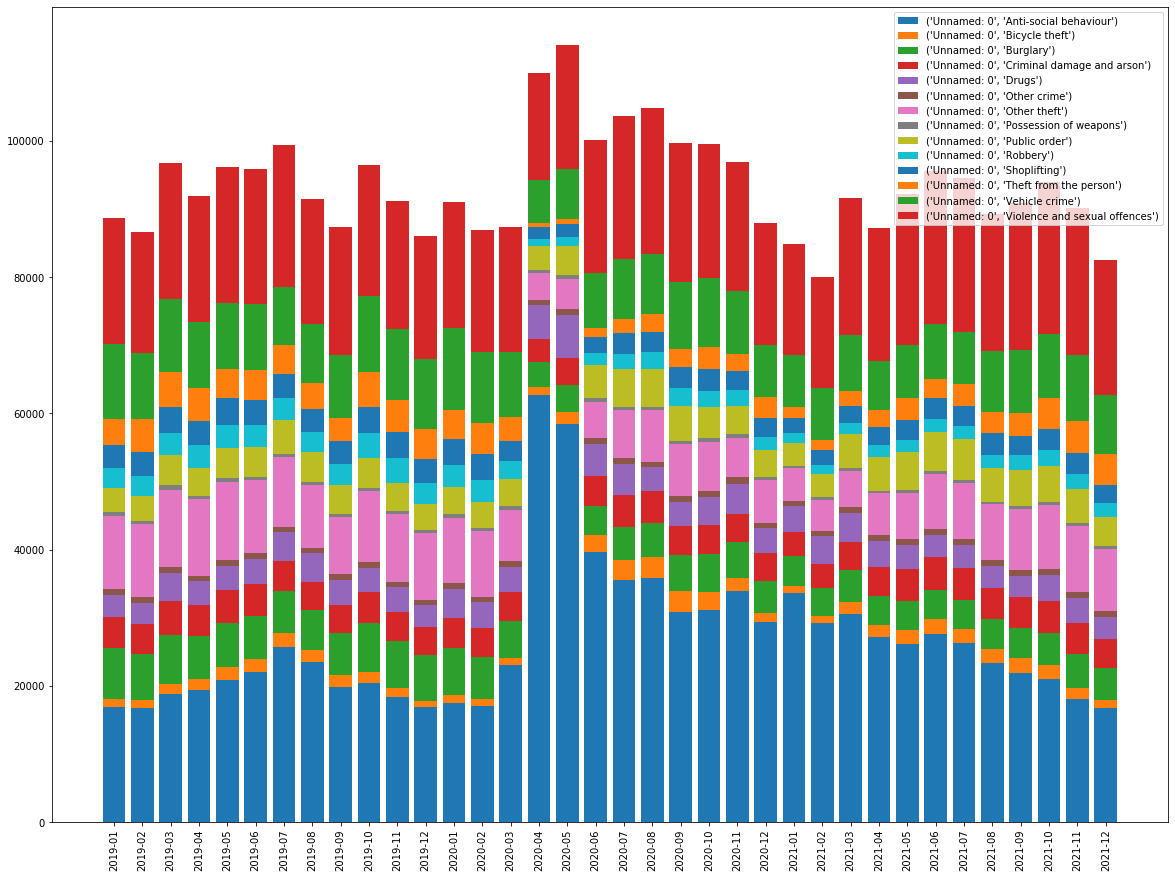

In [54]:
fig, ax = plt.subplots(figsize=(20,15))
bottom = np.zeros(len(df_street_time))
plt.xticks(rotation=90)
for i, col in enumerate(df_street_time.columns):
    ax.bar(df_street_time.index, df_street_time[col], bottom=bottom, label=col)
    bottom += np.array(df_street_time[col])
ax.legend()


In [55]:
df_street_time = df_street_time.div(df_street_time.sum(axis=1), axis=0)


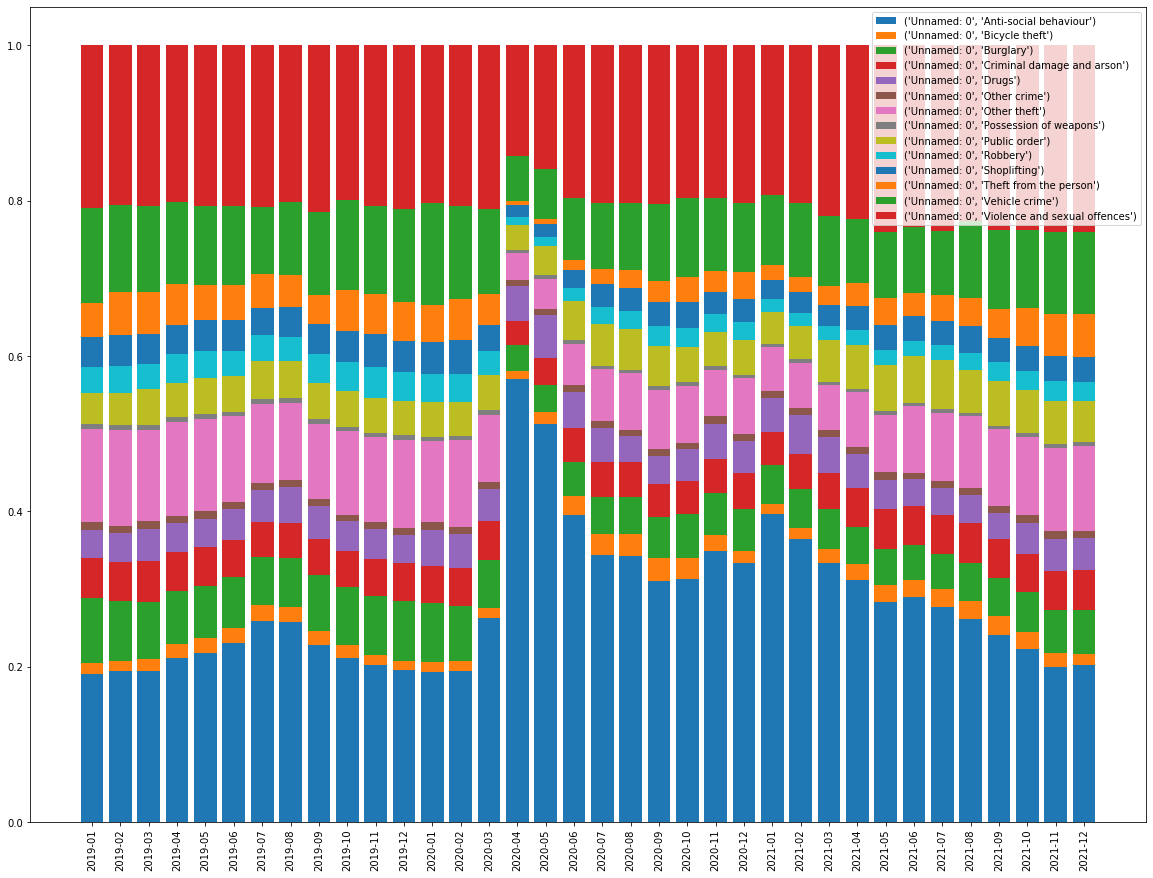

In [56]:
fig, ax = plt.subplots(figsize=(20,15))
bottom = np.zeros(len(df_street_time))
plt.xticks(rotation=90)
for i, col in enumerate(df_street_time.columns):
    ax.bar(df_street_time.index, df_street_time[col], bottom=bottom, label=col)
    bottom += np.array(df_street_time[col])
ax.legend()


In [33]:
freq_location = df_street['Location'].value_counts()[:15].index.tolist()
df_top_location = df_street[df_street['Location'].isin(freq_location)]
df_filter = df_top_location[['Location', 'Crime type', 'Unnamed: 0']]
df_top_location = df_filter.groupby(['Location', 'Crime type']).count().unstack().fillna(0)


In [37]:

df_top_location = df_top_location.div(df_top_location.sum(axis=1), axis=0)
df_top_location

Unnamed: 0  \
Crime type                                     Anti-social behaviour   
Location                                                               
No Location                                                 0.003529   
On or near Conference/Exhibition Centre                     0.248710   
On or near Further/Higher Educational Building              0.214711   
On or near High Street                                      0.282290   
On or near Hospital                                         0.129974   
On or near Nightclub                                        0.126059   
On or near Park/Open Space                                  0.316137   
On or near Parking Area                                     0.227420   
On or near Pedestrian Subway                                0.249313   
On or near Petrol Station                                   0.173339   
On or near Police Station                                   0.231686   
On or near Shopping Area                                    0.125229   
On or near Sports/Recreation Area                           0.303603   
On or near Supermarket                                      0.167744   
On or near Theatre/Concert Hall                             0.220919   

                                                                        \
Crime type                                     Bicycle theft  Burglary   
Location                                                                 
No Location                                         0.028437  0.047258   
On or near Conference/Exhibition Centre             0.040079  0.049413   
On or near Further/Higher Educational Building      0.049624  0.049717   
On or near High Street                              0.021624  0.043444   
On or near Hospital                                 0.038311  0.032348   
On or near Nightclub                                0.020714  0.033292   
On or near Park/Open Space                          0.022571  0.044115   
On or near Parking Area                             0.022169  0.038816   
On or near Pedestrian Subway                        0.022455  0.038173   
On or near Petrol Station                           0.012144  0.034693   
On or near Police Station                           0.014282  0.024649   
On or near Shopping Area                            0.022419  0.025739   
On or near Sports/Recreation Area                   0.016597  0.050612   
On or near Supermarket                              0.026787  0.032443   
On or near Theatre/Concert Hall                     0.031004  0.036654   

                                                                          \
Crime type                                     Criminal damage and arson   
Location                                                                   
No Location                                                     0.052698   
On or near Conference/Exhibition Centre                         0.032942   
On or near Further/Higher Educational Building                  0.032618   
On or near High Street                                          0.039922   
On or near Hospital                                             0.066913   
On or near Nightclub                                            0.026350   
On or near Park/Open Space                                      0.040891   
On or near Parking Area                                         0.040193   
On or near Pedestrian Subway                                    0.039983   
On or near Petrol Station                                       0.039717   
On or near Police Station                                       0.077517   
On or near Shopping Area                                        0.024371   
On or near Sports/Recreation Area                               0.045892   
On or near Supermarket                                          0.031988   
On or near Theatre/Concert Hall                                 0.030054   

                                                           

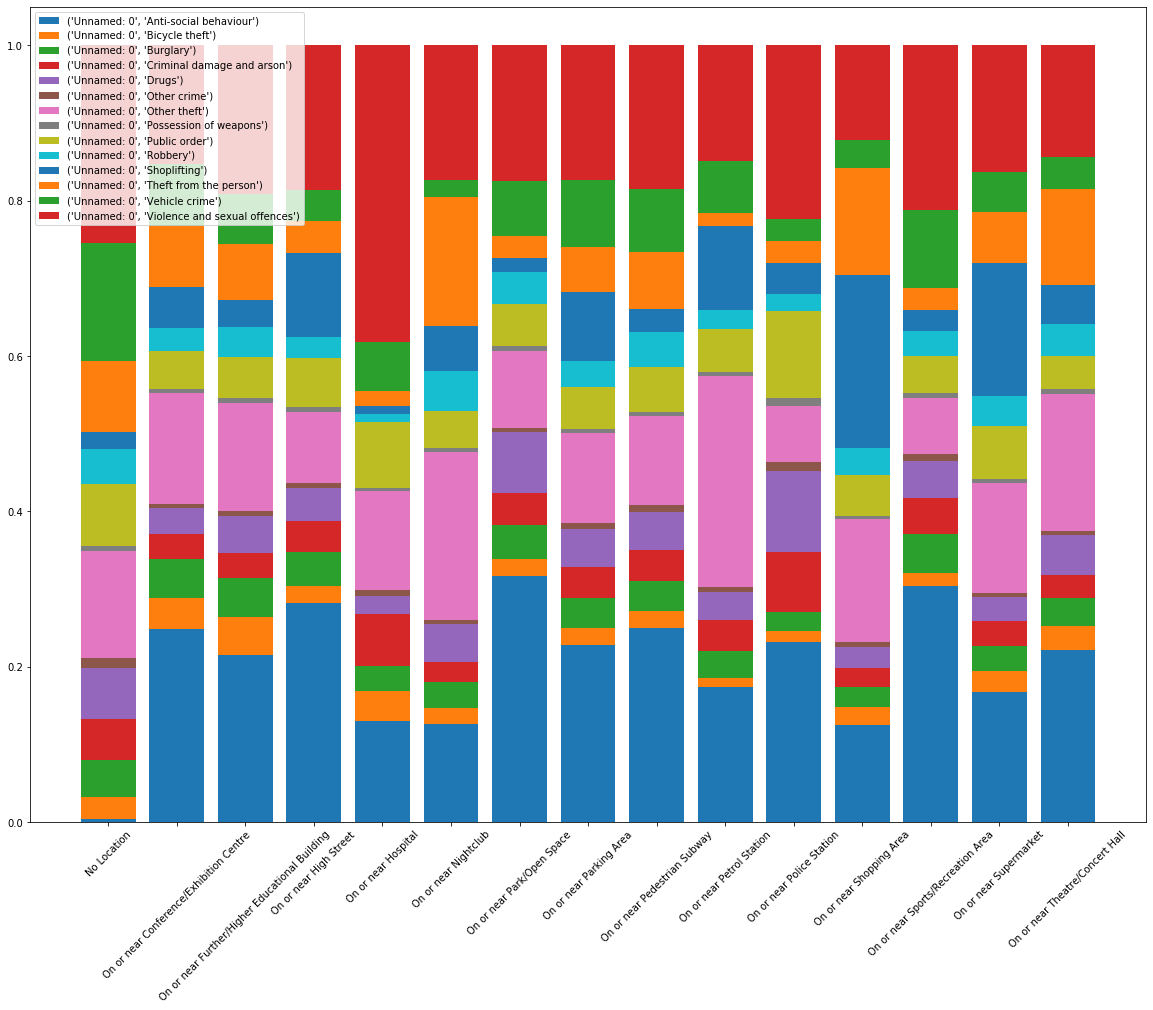

In [47]:
fig, ax = plt.subplots(figsize=(20,15))
bottom = np.zeros(len(df_top_location))
plt.xticks(rotation=45)

for i, col in enumerate(df_top_location.columns):
    ax.bar(df_top_location.index, df_top_location[col], bottom=bottom, label=col)
    bottom += np.array(df_top_location[col])
ax.legend()


In [81]:
from dython.nominal import associations

In [83]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df_search)
categorical_features

['Type',
 'Date',
 'Gender',
 'Age range',
 'Self-defined ethnicity',
 'Officer-defined ethnicity',
 'Legislation',
 'Object of search',
 'Outcome']

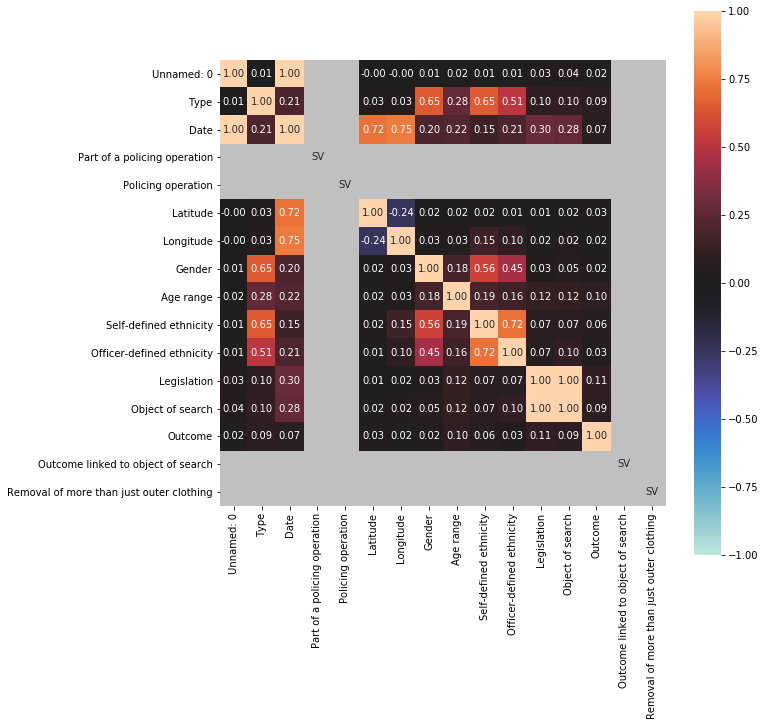

In [88]:
complete_correlation= associations(df_search, filename= 'complete_correlation.png', figsize=(10,10))

In [89]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Unnamed: 0,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Unnamed: 0,1.00,0.01,1.00,0.00,0.00,-0.00,-0.00,0.01,0.02,0.01,0.01,0.03,0.04,0.02,0.00,0.00
Type,0.01,1.00,0.21,0.00,0.00,0.03,0.03,0.65,0.28,0.65,0.51,0.10,0.10,0.09,0.00,0.00
Date,1.00,0.21,1.00,0.00,0.00,0.72,0.75,0.20,0.22,0.15,0.21,0.30,0.28,0.07,0.00,0.00
Part of a policing operation,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Policing operation,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Latitude,-0.00,0.03,0.72,0.00,0.00,1.00,-0.24,0.02,0.02,0.02,0.01,0.01,0.02,0.03,0.00,0.00
Longitude,-0.00,0.03,0.75,0.00,0.00,-0.24,1.00,0.03,0.03,0.15,0.10,0.02,0.02,0.02,0.00,0.00
Gender,0.01,0.65,0.20,0.00,0.00,0.02,0.03,1.00,0.18,0.56,0.45,0.03,0.05,0.02,0.00,0.00
Age range,0.02,0.28,0.22,0.00,0.00,0.02,0.03,0.18,1.00,0.19,0.16,0.12,0.12,0.10,0.00,0.00
Self-defined ethnicity,0.01,0.65,0.15,0.00,0.00,0.02,0.15,0.56,0.19,1.00,0.72,0.07,0.07,0.06,0.00,0.00


In [180]:
df_time_series = df_outcomes.groupby(['LSOA name','Month']).agg('count')

In [181]:
df_time_series = df_time_series[~(df_time_series['Crime ID']<=5)]

In [182]:
df_time_series

Unnamed: 0  Crime ID  Reported by  \
LSOA name                 Month                                        
Barking and Dagenham 001A 2019-03           8         8            8   
                          2020-03          48        48           48   
                          2020-04          43        43           43   
                          2020-05          40        40           40   
                          2020-06          23        23           23   
...                                       ...       ...          ...   
Westminster 024F          2021-02           9         9            9   
                          2021-04          14        14           14   
                          2021-06           9         9            9   
                          2021-07          20        20           20   
                          2021-09           7         7            7   

                                   Falls within  Longitude  Latitude  \
LSOA name                 Month                                        
Barking and Dagenham 001A 2019-03             8          8         8   
                          2020-03            48         48        48   
                          2020-04            43         43        43   
                          2020-05            40         40        40   
                          2020-06            23         23        23   
...                                         ...        ...       ...   
Westminster 024F          2021-02             9          9         9   
                          2021-04            14         14        14   
                          2021-06             9          9         9   
                          2021-07            20         20        20   
                          2021-09             7          7         7   

                                   Location  LSOA code  Outcome type  
LSOA name                 Month                                       
Barking and Dagenham 001A 2019-03         8          8             8  
                          2020-03        48         48            48  
                          2020-04        43         43            43  
                          2020-05        40         40            40  
                          2020-06        23         23            23  
...                                     ...        ...           ...  
Westminster 024F          2021-02         9          9             9  
                          2021-04        14         14            14  
                          2021-06         9          9             9  
                          2021-07        20         20            20  
                          2021-09         7          7             7  

[83705 rows x 9 columns]

In [185]:
df_time_series['Crime ID'].max()

1589

In [186]:
# draw the LSOA map and set its Coordinate Reference Systems (CRS) into EPSG: 27700.
lsoa=gpd.read_file('LSOA_IMD2015.shp')
f, ax = plt.subplots(1, figsize=(12, 12))
ax = lsoa.plot(axes=ax);
lsoa.crs = {'init' :'epsg:27700'}
plt.show()

NameError: name 'gpd' is not defined